In [1]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras import optimizers
from keras.datasets import mnist
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

2024-02-21 10:32:25.357196: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-02-21 10:32:25.357214: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000] # tập validation
X_train, y_train = X_train[:50000,:], y_train[:50000]


In [3]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(50000, 28, 28) (50000,) (10000, 28, 28) (10000,)


In [4]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
X_val = X_val.reshape(-1,28,28,1)


In [5]:
#one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [6]:
input_shape = (28,28,1)
number_of_classes = 10
epochs = 10

In [7]:
#create model 
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape, padding='same'))
# model.add(MaxPool2D(pool_size=(2, 2),strides = 2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2),strides = 2))

# model.add(Dropout(0.25))
model.add(Flatten())
# model.add(Dense(128, activation='relu'))

# model.add(Dropout(0.5))
model.add(Dense(number_of_classes, activation='sigmoid'))

2024-02-21 10:32:26.861985: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-02-21 10:32:26.862020: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-02-21 10:32:26.862041: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (lovetonight): /proc/driver/nvidia/version does not exist
2024-02-21 10:32:26.862288: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 10)                62730     
                                                                 
Total params: 72,298
Trainable params: 72,298
Non-trainable params: 0
____________________________________________________

In [9]:
H = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs)

Epoch 1/10


2024-02-21 10:32:26.919733: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 39200000 exceeds 10% of free system memory.


 541/1563 [=========>....................] - ETA: 19s - loss: 0.4885 - accuracy: 0.9164

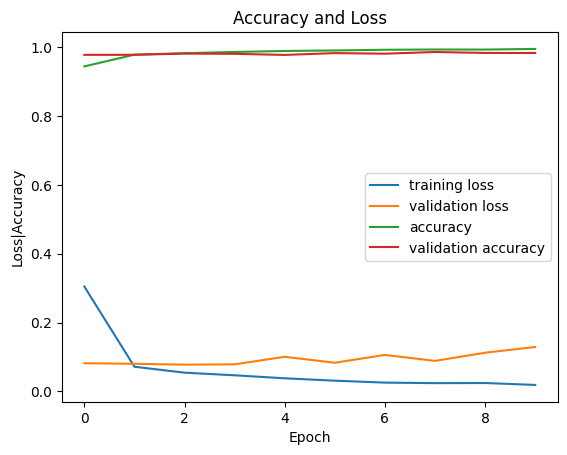

In [ ]:
# 8. Vẽ đồ thị loss, accuracy của traning set và validation set
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()


Learning rate = 0.100000

Learning rate = 0.005000

Learning rate = 0.010000

Learning rate = 0.000010

Learning rate = 0.200000


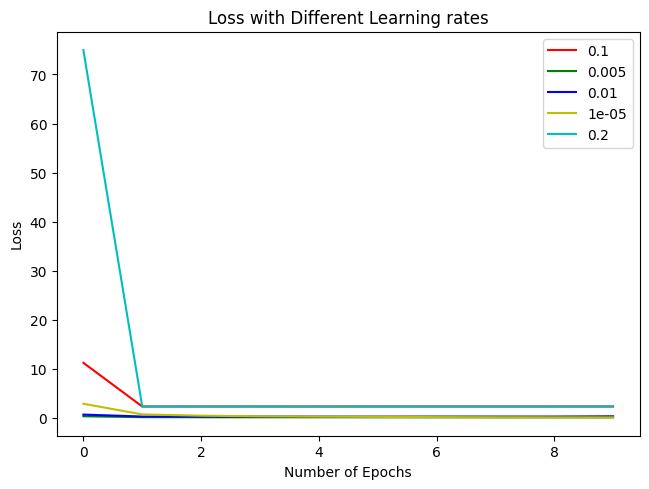

In [ ]:
# Thử với các learning rate khác nhau (giữ nguyên các layer, node và activation function)
learning_rate = [0.1, 0.005, 0.01, 0.00001, 0.2]
colors = ['r', 'g', 'b', 'y', 'c']
for i, lr in enumerate(learning_rate):

  model = Sequential()

  model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape, padding='same'))
  # model.add(MaxPool2D(pool_size=(2, 2),strides = 2))
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(MaxPool2D(pool_size=(2, 2),strides = 2))

  # model.add(Dropout(0.25))
  model.add(Flatten())
  # model.add(Dense(128, activation='relu'))

  # model.add(Dropout(0.5))
  model.add(Dense(number_of_classes, activation='sigmoid'))

  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=lr),
                metrics=['accuracy'])
  print('\nLearning rate = %f' %(lr))
  H = model.fit(X_train, y_train,
                batch_size=32,
                epochs = epochs,
                verbose=0,
                validation_data=(X_val, y_val))
  plt.plot(H.history['accuracy'], colors[i])
  
plt.title('Loss with Different Learning rates')
plt.legend(learning_rate)
plt.tight_layout()
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.show()
     


Activation function = sigmoid

Activation function = tanh

Activation function = relu

Activation function = softmax

Activation function = linear


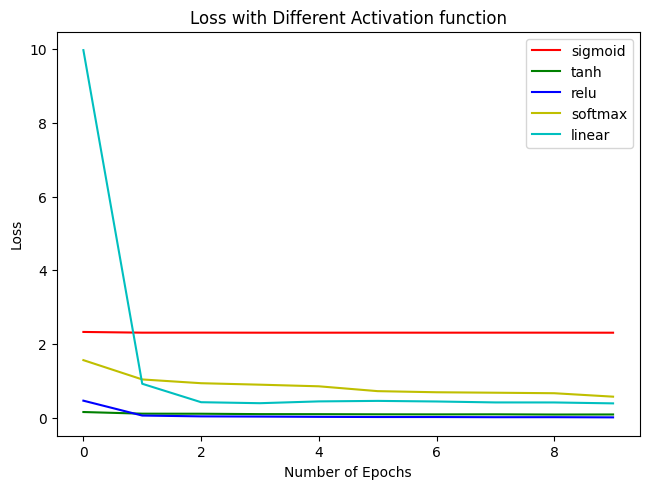

In [ ]:

# Đổi activation function thành sigmoid, tanh, softmax, linear
activation_function = ['sigmoid', 'tanh', 'relu', 'softmax', 'linear']
colors = ['r', 'g', 'b', 'y', 'c']
for i, af in enumerate(activation_function):

  model = Sequential()

  model.add(Conv2D(32, (3, 3), padding='same', activation=af, input_shape=(28,28,1)))
  model.add(Conv2D(32, (3, 3), activation=af))
  # model.add(MaxPooling2D())
  model.add(Flatten())
  model.add(Dense(128, activation=af))
  model.add(Dense(10, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])
  print('\nActivation function = %s' %(af))
  H = model.fit(X_train, y_train,
                batch_size=32,
                epochs = epochs,
                verbose=0,
                validation_data=(X_val, y_val))
  plt.plot(H.history['accuracy'], colors[i])
  
plt.title('Loss with Different Activation function')
plt.legend(activation_function)
plt.tight_layout()
plt.xlabel('Number of Epochs')
plt.ylabel('Cccuracy')
plt.show()
     

313/313 [==============================] - 2s 5ms/step
+ precision = 0.878
+ recall = 0.863
+ f1_score = 0.854


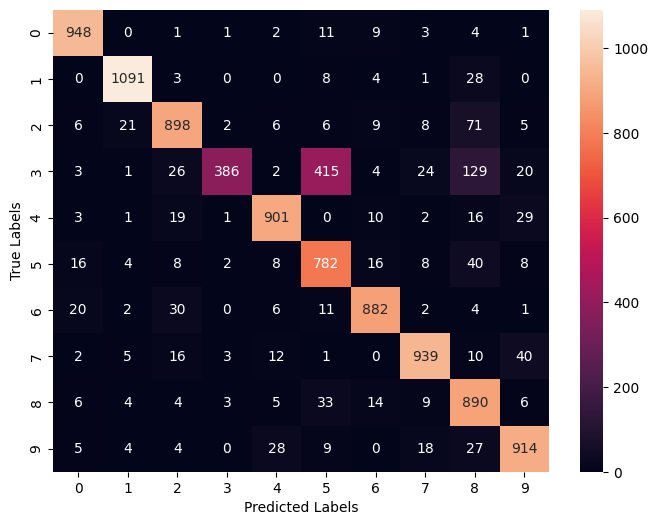

In [ ]:


y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred ,axis = 1)
y_true=np.argmax(y_test,axis = 1)
a = precision_recall_fscore_support(y_true, y_pred, average='macro')
cf = confusion_matrix(y_true,y_pred)

print(f'+ precision = {a[0]:.3f}')
print(f'+ recall = {a[1]:.3f}')
print(f'+ f1_score = {a[2]:.3f}')
plt.figure(figsize = (8,6))
ax = sns.heatmap(data=cf ,fmt="d",annot = True)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
plt.show()

In [ ]:
model.save('./weight/digit_classifier2.h5')